In [105]:
# Import necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
# Load training and query datasets
training_data = pd.read_csv('trainingset.txt', delimiter=',')
query_data = pd.read_csv('queries.txt', delimiter=',')

In [107]:
#print few rows of each dataset
print(training_data.head())
print(query_data.head())

   age      job   marital  education default  balance housing loan  contact  \
0   44  JobCat9    single  secondary      no       29     yes   no  unknown   
1   47  JobCat3   married    unknown      no     1506     yes   no  unknown   
2   31  unknown    single    unknown      no        1      no   no  unknown   
3   26  JobCat6    single   tertiary      no      447     yes  yes  unknown   
4   42  JobCat4  divorced   tertiary     yes        2     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome      y  
0    5   may         0         1     -1         0  unknown  TypeA  
1    5   may         0         1     -1         0  unknown  TypeA  
2    5   may         0         1     -1         0  unknown  TypeA  
3    5   may         0         1     -1         0  unknown  TypeA  
4    5   may         0         1     -1         0  unknown  TypeA  
   age       job  marital  education default  balance housing loan  contact  \
0   58   JobCat6  married   tertiary  

In [108]:
#print data characteristics and non- null values
print("\n The Data charateristics and non-null values:")
print(training_data.info())


 The Data charateristics and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27272 entries, 0 to 27271
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27272 non-null  int64 
 1   job        27272 non-null  object
 2   marital    27272 non-null  object
 3   education  27272 non-null  object
 4   default    27272 non-null  object
 5   balance    27272 non-null  int64 
 6   housing    27272 non-null  object
 7   loan       27272 non-null  object
 8   contact    27272 non-null  object
 9   day        27272 non-null  int64 
 10  month      27272 non-null  object
 11  duration   27272 non-null  int64 
 12  campaign   27272 non-null  int64 
 13  pdays      27272 non-null  int64 
 14  previous   27272 non-null  int64 
 15  poutcome   27272 non-null  object
 16  y          27272 non-null  object
dtypes: int64(7), object(10)
memory usage: 3.5+ MB
None


In [109]:
#check for missing values
print("training_data")
print(training_data.isna().sum())
print("query_data")
print(query_data.isna().sum())


training_data
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
query_data
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
 campaign    0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [110]:
#Print statistical summary of numerical features
print("Statistical Summary of Numerical Features:")
print(training_data.describe())

Statistical Summary of Numerical Features:
                age       balance           day  duration      campaign  \
count  27272.000000  27272.000000  27272.000000   27272.0  27272.000000   
mean      39.880463   1361.079459     15.769287       0.0      2.739623   
std       11.426248   3015.207142      8.300983       0.0      3.011097   
min       16.000000  -6847.000000      1.000000       0.0      1.000000   
25%       31.000000     73.000000      8.000000       0.0      1.000000   
50%       37.000000    447.000000     16.000000       0.0      2.000000   
75%       48.000000   1423.000000     21.000000       0.0      3.000000   
max       95.000000  98417.000000     31.000000       0.0     63.000000   

              pdays      previous  
count  27272.000000  27272.000000  
mean      40.074105      0.578872  
std      100.200984      1.942882  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.00

In [111]:
#I want to see the distribution of the target variables
print("\nDistribution of Target Variable:")
print(training_data['y'].value_counts())



Distribution of Target Variable:
TypeA    24030
TypeB     3242
Name: y, dtype: int64


In [112]:
# Drop 'campaign' column from training_data if it exists
if 'campaign' in training_data.columns:
    training_data.drop('campaign', axis=1, inplace=True)


In [113]:
# adding column names to the numerical columns
numerical_cols = ['age', 'balance', 'day', 'duration', 'pdays', 'previous']

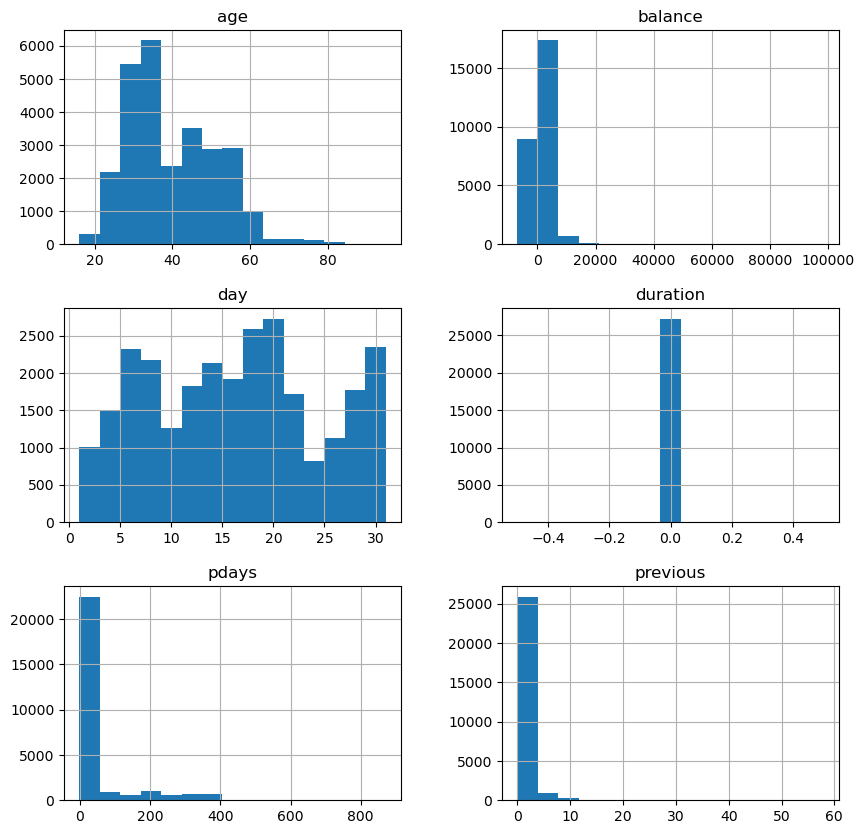

In [114]:
# I want to do some basic exploratory data analysis to get a basic understanding of the data
training_data.hist(bins=15, figsize=(10, 10))
plt.show()

In [115]:
#adding column names to the categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

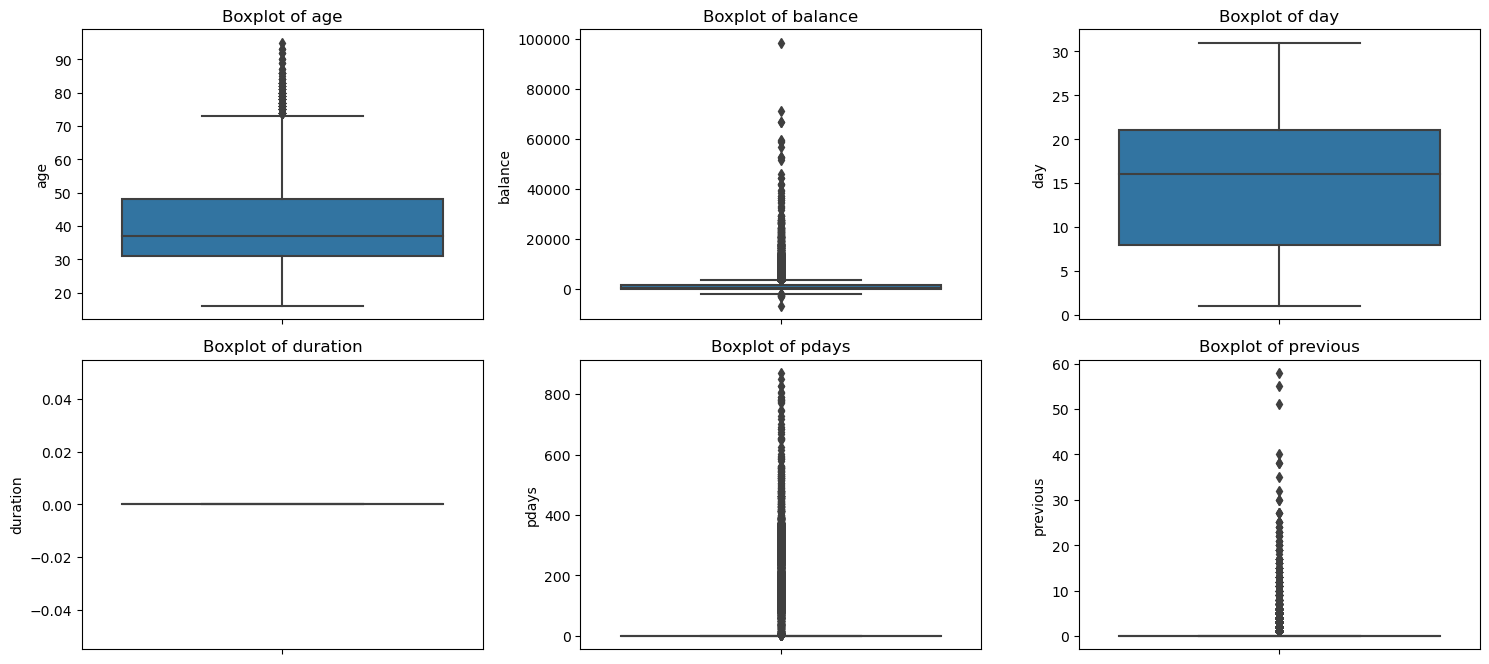

In [116]:
# I want to do some basic exploratory data analysis to get a basic understanding of the data
plt.figure(figsize=(15, 10))  
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1) 
    sns.boxplot(y=training_data[col])
    plt.title(f'Boxplot of {col}') 
plt.tight_layout() 
plt.show()

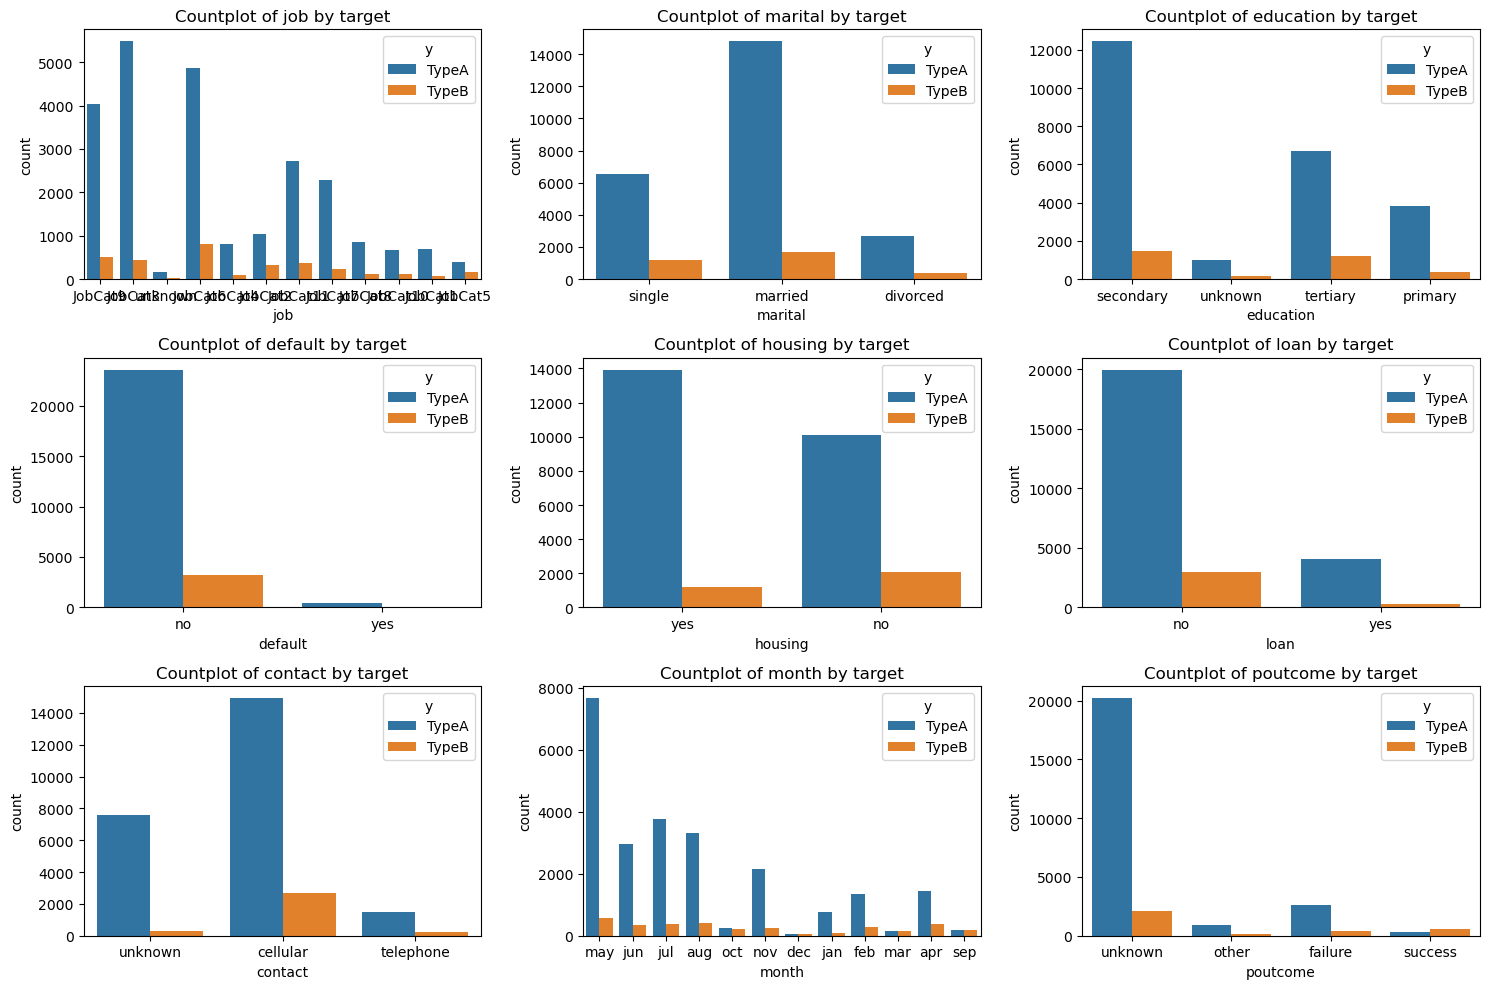

In [117]:
#plotting variables against the target varaible y
plt.figure(figsize=(15, 10))  

for i, col in enumerate(categorical_cols):
    plt.subplot((len(categorical_cols) - 1) // 3 + 1, 3, i + 1)  
    sns.countplot(x=col, hue='y', data=training_data)
    plt.title(f'Countplot of {col} by target')  

plt.tight_layout()  
plt.show()

In [118]:
#checking the unknown counts in both datasets
def count_unknowns(data):
    unknown_counts = {}
    for col in data.columns:
        if data[col].dtype == 'object':  # Only consider categorical columns
            unknown_count = (data[col] == 'unknown').sum()
            if unknown_count > 0:
                unknown_counts[col] = unknown_count
    return unknown_counts


training_unknown_counts = count_unknowns(training_data)
query_unknown_counts = count_unknowns(query_data)

print("Training Data Unknown Counts:", training_unknown_counts)
print("Query Data Unknown Counts:", query_unknown_counts)

Training Data Unknown Counts: {'job': 178, 'education': 1172, 'contact': 7897, 'poutcome': 22316}
Query Data Unknown Counts: {'job': 110, 'education': 685, 'contact': 5123, 'poutcome': 14643}


In [119]:
#for job and education i will impute using the mode as there isnt too many unknowns in these variables
for column in ['job', 'education']:
    mode_value = training_data[column].mode()[0]
    training_data[column].replace('unknown', mode_value, inplace=True)
    query_data[column].replace('unknown', mode_value, inplace=True)

In [120]:
# Feature Engineering: Create a new feature 'age_balance_interaction' in both datasets
training_data['age_balance_interaction'] = training_data['age'] * training_data['balance']
query_data['age_balance_interaction'] = query_data['age'] * query_data['balance']


In [121]:
# Preprocessing pipeline for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [122]:
# Preprocessing pipeline for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [123]:
# Define the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  
)


In [124]:
# Define the GradientBoostingClassifier model
model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=0
)

In [125]:
# create the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [126]:
# Split training data into features and target variable
X = training_data.drop('y', axis=1)
y = training_data['y']

In [127]:
# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [128]:
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', GradientBoostingClassifier(random_state=0))])

In [129]:
#prediction accuracy
valid_preds = pipeline.predict(X_valid)

In [130]:
# #Evaluate the model on the validation data. accuracy is 89.22%. the accuracy somehow has decreases since i did all the preprocessing 
# steps to ignore unknown values, impute values and create a new variable based on age and balance. originally i was getting an
#accuracy score of 89.55%. gradient boosting classifer predicts type b at 59% accuracy which is the highest of the 3 models.
# gradient boost classifier seemed to perform the best of the 3 models only marginally better than random forest and this is 
# probably due to its ability to combine weak decision trees into stronger learners using an iterative fashion.
valid_accuracy = accuracy_score(y_valid, valid_preds)
print(f'Validation Accuracy: {valid_accuracy:.4f}')

Validation Accuracy: 0.8922


In [131]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix1 = confusion_matrix(y_valid, valid_preds)
print(conf_matrix1)

[[4742   96]
 [ 492  125]]


In [132]:
# shows scores for precision, recall, f1-score and support
from sklearn.metrics import classification_report
class_report1 = classification_report(y_valid, valid_preds)
print(class_report1)

              precision    recall  f1-score   support

       TypeA       0.91      0.98      0.94      4838
       TypeB       0.57      0.20      0.30       617

    accuracy                           0.89      5455
   macro avg       0.74      0.59      0.62      5455
weighted avg       0.87      0.89      0.87      5455



In [133]:
#import logistic regression from scikit learn
from sklearn.linear_model import LogisticRegression

In [134]:
# Define the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=0)

In [135]:
# Create the pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', logistic_model)
])

In [136]:
# Train the pipeline on the training data
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', LogisticRegression(max_iter=1000, random_state=0))])

In [137]:
# Evaluate the model on the validation data. accuracy is only 80.71% which is quite poor compared to random forrest and gradient
# boosting classifier. it also had by far the lowest score for predicting type b at only about 0.05%. It seems that logistic 
# as a model is a bit too simple as a model to perform well with complex data as logistic regression assumes linear boundary
# between classes
logistic_preds = logistic_pipeline.predict(X_valid)
logistic_accuracy = accuracy_score(y_valid, logistic_preds)

print(f'Logistic Regression Model Accuracy on Validation Set: {logistic_accuracy:.4f}')

Logistic Regression Model Accuracy on Validation Set: 0.8071


In [138]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix3 = confusion_matrix(y_valid, logistic_preds)
print(conf_matrix3)

[[4378  460]
 [ 592   25]]


In [139]:
# shows scores for precision, recall, f1-score and support
from sklearn.metrics import classification_report
class_report3 = classification_report(y_valid, logistic_preds)
print(class_report3)

              precision    recall  f1-score   support

       TypeA       0.88      0.90      0.89      4838
       TypeB       0.05      0.04      0.05       617

    accuracy                           0.81      5455
   macro avg       0.47      0.47      0.47      5455
weighted avg       0.79      0.81      0.80      5455



In [140]:
#define the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

In [141]:
# Create the random forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

In [142]:
#trian the model on training data
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', RandomForestClassifier(random_state=0))])

In [143]:
#evaluate the model on validation data. 89.11% accuracy. the accuracy somehow has decreases since i did all the preprocessing 
# steps to ignore unknown values, impute values and create a new variable based on age and balance. originally i was getting an
#accuracy score of 89.53%. random forrest has 55% accuracy when it comes to predicting type b. Random forest performed very well
# which suggest that random forest performs well on complex datasets and captures the relationships in the data well.
rf_preds = rf_pipeline.predict(X_valid)
rf_accuracy = accuracy_score(y_valid, rf_preds)
print(f'Random Forest Model accuracy on validation set: {rf_accuracy:.4f}')

Random Forest Model accuracy on validation set: 0.8911


In [144]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix2 = confusion_matrix(y_valid, rf_preds)
print(conf_matrix2)

[[4725  113]
 [ 481  136]]


In [145]:
# shows scores for precision, recall, f1-score and support
from sklearn.metrics import classification_report
class_report2 = classification_report(y_valid, rf_preds)
print(class_report2)

              precision    recall  f1-score   support

       TypeA       0.91      0.98      0.94      4838
       TypeB       0.55      0.22      0.31       617

    accuracy                           0.89      5455
   macro avg       0.73      0.60      0.63      5455
weighted avg       0.87      0.89      0.87      5455



In [146]:
#now for predicting on the query data using gradient 
valid_preds = pipeline.predict(query_data)

In [147]:
# Write predictions to a .txt with my student number
student_number = 'C17357361'
filename = f'{student_number}.txt'

In [149]:
# predictions printed to C17357361.txt
with open(filename, 'w') as file:
    for idx, prediction in enumerate(valid_preds, 1):
        file.write(f"{idx},{prediction}\n")

print(f"Predictions written to {filename}")

Predictions written to C17357361.txt
